In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.model.data import __version__

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

from src.base import logger
from src.config import get_config, init_config_file
from src.model.data import make_dataset
from src.model.preprocessing import PreProcessor

pd.options.display.max_columns = None

%config IPCompleter.use_jedi=False

In [10]:
data_config = get_config(filename="config/model.yaml")

features_config = get_config(filename="config/features.yaml")

X,y  = make_dataset(data_config, download_bases=False)

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.25, random_state=42)

preprocessor = PreProcessor(features_config)

preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)

X_test = preprocessor.transform(X_test)

# classifier = LogisticRegression(solver="liblinear")

# classifier.fit(X_train, y_train)

# f1_score(y_test,classifier.predict(X_test), average = 'weighted')

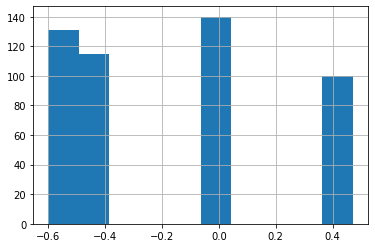

In [11]:
X_test['x_minimum'].hist()

plt.show()

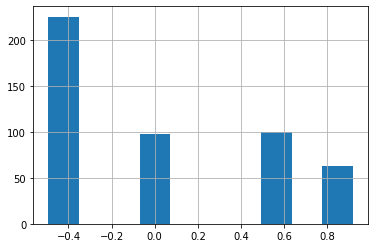

In [7]:
X_test['x_minimum'].hist()

plt.show()

<AxesSubplot:>

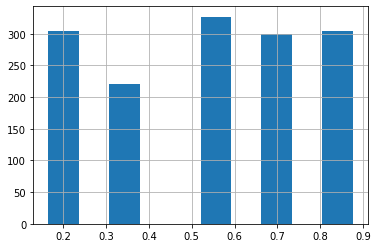

In [128]:
disc = Discretizer(strategy='kmeans')

disc.fit(X_train[['orientation_index']])

teste = disc.transform(X_train[['orientation_index']])

teste['orientation_index'].hist()

,orientation_index
566,0.0
1787,1.0
411,2.0
726,0.0
384,2.0
...,...
1293,3.0
1162,2.0
1343,3.0
1362,0.0


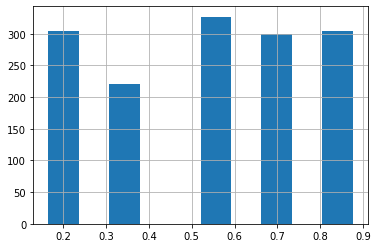

In [96]:
teste['orientation_index'].replace({0.0: 0.16567945911505852,
  1.0: 0.3683965019984609,
  2.0: 0.5276559849836888,
  3.0: 0.7020480727864002,
  4.0: 0.8759461053812756}).hist()
plt.show()

In [15]:
X = X_train[['orientation_index']]

disc = Discretizer(strategy='kmeans')

disc.fit(X)

# disc.fit(X_train[['orientation_index']])

X_temp = disc.transform(X)

In [16]:
X

,orientation_index
566,0.248597
1787,0.446496
411,0.565388
726,0.236968
384,0.608385
...,...
1293,0.786494
1162,0.597062
1343,0.665052
1362,0.044986


In [32]:
X

,orientation_index
566,0.248597
1787,0.446496
411,0.565388
726,0.236968
384,0.608385
...,...
1293,0.786494
1162,0.597062
1343,0.665052
1362,0.044986


In [67]:
value_maps

[{0.0: 0.16567945911505852,
  1.0: 0.3683965019984609,
  2.0: 0.5276559849836888,
  3.0: 0.7020480727864002,
  4.0: 0.8759461053812756}]

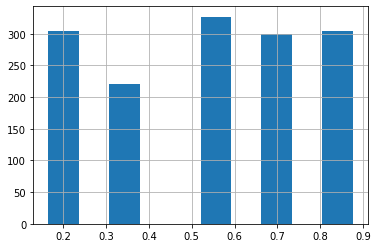

In [60]:
pd.DataFrame(temp_columns)['orientation_index'].hist()

plt.show()

<AxesSubplot:>

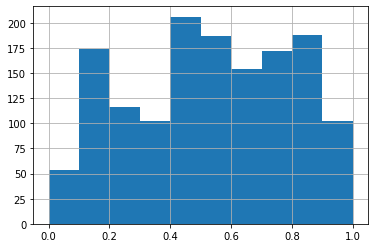

In [61]:
X['orientation_index'].hist()

In [6]:
disc.discretizer.transform(X_train[['orientation_index']])

array([[1.],
       [2.],
       [2.],
       ...,
       [3.],
       [0.],
       [3.]])

In [41]:
teste

,orientation_index
566,0.248597
1787,0.446496
411,0.565388
726,0.236968
384,0.608385
...,...
1293,0.786494
1162,0.597062
1343,0.665052
1362,0.044986


In [23]:
teste['orientation_index'].unique()

array([0.24859737, 0.44649597, 0.56538815, 0.23696828, 0.60838519,
       0.78649393, 0.18550444, 0.38171988, 0.94205855, 0.18320922,
       0.28027135, 0.77644599, 0.93221463, 0.90451902, 0.44868918,
       0.23059268, 0.17591554, 0.69341018, 0.86437825, 0.94170152,
       0.19687851, 0.49505253, 0.84815873, 0.09236968, 0.17668061,
       0.5234112 , 0.90492706, 0.34203815, 0.82857289, 0.79118637,
       0.87758849, 0.71365908, 0.16030807, 0.71819851, 0.46822401,
       0.8138325 , 0.8351015 , 0.55416709, 0.19703152, 0.25966541,
       0.94063042, 0.85550342, 0.75007651, 0.81082322, 0.8265837 ,
       0.83168418, 0.83923289, 0.9553198 , 0.18070999, 0.50831378,
       0.89885749, 0.54605733, 0.66505151, 0.72686933, 0.69907171,
       0.52575742, 0.24002856, 0.29103336, 0.06151178, 0.63674385,
       0.60435581, 0.67719066, 0.18698358, 0.8010813 , 0.62929715,
       0.36754055, 0.80674283, 0.25344282, 0.16943793, 0.52540039,
       0.81852494, 0.62256452, 0.67244721, 0.7350811 , 0.87085

In [3]:
%run src/model/preprocessing.py

heart = pd.read_csv("/home/risknow/Datasets/heart.csv")

#init_config_file(heart.drop(columns='output'), filename='config/output_file.yaml')

features_config = get_config(filename='config/output_file.yaml')

X = heart.drop(columns='output')
y = heart['output']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.25, random_state=42)

preprocessor = PreProcessor(features_config)

preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)

X_test = preprocessor.transform(X_test)

classifier = LogisticRegression(solver="liblinear")

classifier.fit(X_train, y_train)

f1_score(y_test,classifier.predict(X_test), average = 'weighted')

0.7726854589657665


(2022-03-22 01:03:28,270)
[DEBUG] findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.

(2022-03-22 01:03:28,272)
[DEBUG] findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:28,273)
[DEBUG] findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335

(2022-03-22 01:03:28,273)
[DEBUG] findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335

(2022-03-22 01:03:28,275)
[DEBUG] findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335

(2022-03-22 01:03:28,275)
[DEBUG] findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335

(2022-03-22 01:03:28,276)
[DEBUG] findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05

(2022-03-22 01:03:28,276)
[DEBUG] findfont:


(2022-03-22 01:03:28,414)
[DEBUG] findfont: score(<Font 'MathJax_WinChrome' (MathJax_WinChrome-Regular.otf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:28,416)
[DEBUG] findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-BoldOblique.ttf) oblique normal 700 normal>) = 11.335

(2022-03-22 01:03:28,417)
[DEBUG] findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:28,417)
[DEBUG] findfont: score(<Font 'MathJax_Main' (MathJax_Main-Regular.otf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:28,419)
[DEBUG] findfont: score(<Font 'Latin Modern Mono' (lmmono10-italic.otf) italic normal 400 normal>) = 11.05

(2022-03-22 01:03:28,420)
[DEBUG] findfont: score(<Font 'Saab' (Saab.ttf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:28,424)
[DEBUG] findfont: score(<Font 'Laksaman' (Laksaman-Bold.ttf) normal normal 700 normal>) = 10.335

(2022-03-22 01:03:28,425)
[DEBUG] findfont: score(<Font 'Lohit Assamese' (Lohit-Assamese.ttf) no


(2022-03-22 01:03:28,547)
[DEBUG] findfont: score(<Font 'Pothana2000' (Pothana2000.ttf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:28,548)
[DEBUG] findfont: score(<Font 'Kinnari' (Kinnari-Oblique.ttf) oblique normal 500 normal>) = 11.145

(2022-03-22 01:03:28,549)
[DEBUG] findfont: score(<Font 'Lohit Tamil Classical' (Lohit-Tamil-Classical.ttf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:28,550)
[DEBUG] findfont: score(<Font 'KacstArt' (KacstArt.ttf) normal normal 500 normal>) = 10.145

(2022-03-22 01:03:28,550)
[DEBUG] findfont: score(<Font 'Lato' (Lato-SemiboldItalic.ttf) italic normal 600 normal>) = 11.24

(2022-03-22 01:03:28,555)
[DEBUG] findfont: score(<Font 'Aroania' (Aroania_hint.ttf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:28,558)
[DEBUG] findfont: score(<Font 'Nilus' (Nilus_hint.ttf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:28,559)
[DEBUG] findfont: score(<Font 'PermianSerifTypeface' (PermianSerifTypeface-Italic.otf) italic nor


(2022-03-22 01:03:28,652)
[DEBUG] findfont: score(<Font 'TeX Gyre Bonum' (texgyrebonum-regular.otf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:28,653)
[DEBUG] findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335

(2022-03-22 01:03:28,654)
[DEBUG] findfont: score(<Font 'Waree' (Waree-Bold.ttf) normal normal 700 normal>) = 10.335

(2022-03-22 01:03:28,655)
[DEBUG] findfont: score(<Font 'TeX Gyre Termes' (texgyretermes-bolditalic.otf) italic normal 700 normal>) = 11.335

(2022-03-22 01:03:28,656)
[DEBUG] findfont: score(<Font 'Ubuntu' (Ubuntu-B.ttf) normal normal 700 normal>) = 10.335

(2022-03-22 01:03:28,658)
[DEBUG] findfont: score(<Font 'Aegyptus' (AegyptusB_hint.ttf) normal normal 700 normal>) = 10.335

(2022-03-22 01:03:28,659)
[DEBUG] findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05

(2022-03-22 01:03:28,659)
[DEBUG] findfont: score(<Font 'Latin Modern Sans Demi Cond' (lmsansdemicond10


(2022-03-22 01:03:28,718)
[DEBUG] findfont: score(<Font 'Lohit Odia' (Lohit-Odia.ttf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:28,718)
[DEBUG] findfont: score(<Font 'Abydos' (AbydosB_hint.ttf) normal normal 700 normal>) = 10.335

(2022-03-22 01:03:28,719)
[DEBUG] findfont: score(<Font 'MathJax_Fraktur' (MathJax_Fraktur-Bold.otf) normal normal 700 normal>) = 10.335

(2022-03-22 01:03:28,720)
[DEBUG] findfont: score(<Font 'Norasi' (Norasi-BoldItalic.ttf) italic normal 700 normal>) = 11.335

(2022-03-22 01:03:28,720)
[DEBUG] findfont: score(<Font 'Latin Modern Sans' (lmsans10-boldoblique.otf) oblique normal 700 normal>) = 11.335

(2022-03-22 01:03:28,721)
[DEBUG] findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05

(2022-03-22 01:03:28,722)
[DEBUG] findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05

(2022-03-22 01:03:28,722)
[DEBUG] findfont: score(<Font 'TeX Gyre Curs


(2022-03-22 01:03:28,821)
[DEBUG] findfont: score(<Font 'Gargi' (Gargi.ttf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:28,821)
[DEBUG] findfont: score(<Font 'MathJax_Vector' (MathJax_Vector-Regular.otf) normal normal 500 normal>) = 10.145

(2022-03-22 01:03:28,822)
[DEBUG] findfont: score(<Font 'Laksaman' (Laksaman-Italic.ttf) italic normal 400 normal>) = 11.05

(2022-03-22 01:03:28,823)
[DEBUG] findfont: score(<Font 'Lato' (Lato-Heavy.ttf) normal normal 800 normal>) = 10.43

(2022-03-22 01:03:28,824)
[DEBUG] findfont: score(<Font 'Purisa' (Purisa-Oblique.ttf) oblique normal 400 normal>) = 11.05

(2022-03-22 01:03:28,824)
[DEBUG] findfont: score(<Font 'Latin Modern Roman' (lmroman5-bold.otf) normal normal 700 normal>) = 10.335

(2022-03-22 01:03:28,825)
[DEBUG] findfont: score(<Font 'Latin Modern Sans' (lmsans10-bold.otf) normal normal 700 normal>) = 10.335

(2022-03-22 01:03:28,826)
[DEBUG] findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic no


(2022-03-22 01:03:28,905)
[DEBUG] findfont: score(<Font 'Asea' (AseaB_hint.ttf) normal normal 700 normal>) = 10.335

(2022-03-22 01:03:28,906)
[DEBUG] findfont: score(<Font 'Lato' (Lato-ThinItalic.ttf) italic normal 200 normal>) = 11.24

(2022-03-22 01:03:28,907)
[DEBUG] findfont: score(<Font 'Ubuntu' (Ubuntu-LI.ttf) italic normal 300 normal>) = 11.145

(2022-03-22 01:03:28,909)
[DEBUG] findfont: score(<Font 'Anatolian' (Anatolian_hint.ttf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:28,910)
[DEBUG] findfont: score(<Font 'TeX Gyre Schola' (texgyreschola-regular.otf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:28,913)
[DEBUG] findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter.ttf) normal normal 500 normal>) = 10.145

(2022-03-22 01:03:28,915)
[DEBUG] findfont: score(<Font 'Latin Modern Roman' (lmroman8-bold.otf) normal normal 700 normal>) = 10.335

(2022-03-22 01:03:28,918)
[DEBUG] findfont: score(<Font 'MathJax_Main' (MathJax_Main-Italic.otf) italic normal 400


(2022-03-22 01:03:29,019)
[DEBUG] findfont: score(<Font 'Manjari' (Manjari-Regular.otf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:29,020)
[DEBUG] findfont: score(<Font 'Laksaman' (Laksaman-BoldItalic.ttf) italic normal 700 normal>) = 11.335

(2022-03-22 01:03:29,021)
[DEBUG] findfont: score(<Font 'Latin Modern Roman' (lmroman10-bold.otf) normal normal 700 normal>) = 10.335

(2022-03-22 01:03:29,022)
[DEBUG] findfont: score(<Font 'Latin Modern Roman Slanted' (lmromanslant17-regular.otf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:29,023)
[DEBUG] findfont: score(<Font 'padmaa' (padmaa-Medium-0.5.ttf) normal normal 500 normal>) = 10.145

(2022-03-22 01:03:29,024)
[DEBUG] findfont: score(<Font 'Latin Modern Mono' (lmmono8-regular.otf) normal normal 400 normal>) = 10.05

(2022-03-22 01:03:29,026)
[DEBUG] findfont: score(<Font 'KacstDecorative' (KacstDecorative.ttf) normal normal 500 normal>) = 10.145

(2022-03-22 01:03:29,027)
[DEBUG] findfont: score(<Font 'Lato' (Lat

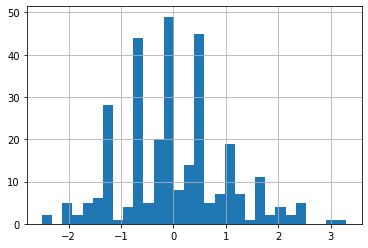

In [4]:
teste = preprocessor.transform(X)
teste['trtbps'].hist(bins=30)
plt.show()

In [37]:
import yaml
from io import StringIO

def init_config_file(dataframe, filename):
    
    data = [column_properties(dataframe[col]) for col in dataframe.columns]

    string_stream = StringIO()

    yaml.dump(data, string_stream, default_flow_style=False, sort_keys=False)

    main_string = string_stream.getvalue()

    string_stream.close()

    main_string = (
        main_string
        .replace("\n- name:","\n\n- name:")
        .replace("'[left(]","")
        .replace("[right]'","")
    )


    with open(filename, 'w') as outfile:
        outfile.write(main_string)


In [29]:
from src.base.file import read_file_string
main_string = read_file_string('config/output_file.yaml', splitlines=False)

main_string = (
    main_string
    .replace("\n- name:","\n\n- name:")
    .replace("'[left(]","")
    .replace("[right]'","")
)

main_string

'- name: age\n  dtype: int\n  limits: [29, 77]\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n\n- name: sex\n  dtype: int\n  limits: [0, 1]\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n\n- name: cp\n  dtype: int\n  limits: [0, 3]\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n\n- name: trtbps\n  dtype: int\n  limits: [94, 200]\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n\n- name: chol\n  dtype: int\n  limits: [126, 564]\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n\n- name: fbs\n  dtype: int\n  limits: [0, 1]\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n\n- name: restecg

"- name: age\n  dtype: int\n  limits: '[left(][29, 77][right]'\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n- name: sex\n  dtype: int\n  limits: '[left(][0, 1][right]'\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n- name: cp\n  dtype: int\n  limits: '[left(][0, 3][right]'\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n- name: trtbps\n  dtype: int\n  limits: '[left(][94, 200][right]'\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n- name: chol\n  dtype: int\n  limits: '[left(][126, 564][right]'\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n- name: fbs\n  dtype: int\n  limits: '[left(][0, 1][right]'\n  transformation: identity\n  imputation_strat